In [ ]:
import twint
import glob
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from pandas.api.types import is_numeric_dtype
from collections import Counter

In [ ]:
# Follow this to combine all csv files
# https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/

# Using glob to get names of all csv files
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

all_filenames =  ['Pollution.csv', 
                  'Pollution_in_india_Ayush_latest.csv', 
                  'Pollution-2.csv', 'Pollution-2-2.csv', 
                  'Pollution-3.csv', 'Pollution-4.csv', 
                  'Pollution-5.csv', 'Pollution-NO-limit.csv', 
                  'Pollution-untill-2021-06-05.csv', ]
combined_csv = None
for f in all_filenames:
    df=pd.read_csv(f)
    df.drop_duplicates(inplace=True)
    combined_csv = pd.concat([combined_csv,df])
    
print("Initial shape " , combined_csv.shape)
combined_csv.drop_duplicates(inplace=True)
print("After dropping duplicates ", combined_csv.shape)
combined_csv = combined_csv.sort_values(by=["created_at"], ascending=False)

In [ ]:
combined_csv.to_csv( "Pollution_Devanshu.csv", index=False, encoding='utf-8-sig')

## Q4,5

In [11]:
df=pd.read_csv("Pollution_Devanshu.csv")
IDs = []
id_to_name = {}
for i in df.index:
    res = ast.literal_eval(df["mentions"][i])
    for mention in res:
        IDs.append(mention['id'])
        id_to_name[mention['id']] = [mention['screen_name'], mention['name']]
        
cnt_mention = Counter(IDs).most_common(10)
Total_mentions=len(Counter(IDs))

for user_id in cnt_mention:
    print(id_to_name[user_id[0]][1])

pmo india
narendra modi
moef&cc
prakash javadekar
central pollution control board
ministry of health
arvind kejriwal
cnn travel
plastic finance
change.org india


In [18]:
data = pd.read_csv("Pollution_Devanshu.csv")


lang = list(data["language"])
htag = list(data["hashtags"])

hx=[]
flag=0
for entry in htag:
    if(type(entry) == str and len(entry)>2):
        x=(entry)
        string=""
        for j in range(1,len(x)-1):
            if (x[j]=="'" and flag==0):
                continue

            elif(x[j]=="'" and flag==1):
                hx.append(string)
                flag=0
                string=""

            elif(x[j]=="," or x[j]==" "):
                continue

            else:
                string+=x[j]
                flag=1

cnt_hashtag = Counter(hx).most_common(10)
cnt_lang = Counter(lang).most_common(8)

Total_hastags = len(Counter(hx))
Total_languages = len(Counter(lang))

d = list(data["date"])
dates = []
for i in d:
    dates.append(i[:-3])

cnt_dates = sorted(Counter(dates).most_common())
# print(htag)
print("Top 10 hashtags ")
for hastag in cnt_hashtag:
    print(hastag[0])

print("Top languages ", cnt_lang)
for lang in cnt_lang:
    print(lang[0])

Top 10 hashtags 
pollution
environment
plastic
india
waste
plasticwaste
finance
esg
bitcoin
ico
Top languages  [('en', 44426), ('und', 946), ('hi', 232), ('in', 118), ('fr', 96), ('et', 56), ('tl', 46), ('ja', 39)]
en
und
hi
in
fr
et
tl
ja


## Q6

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

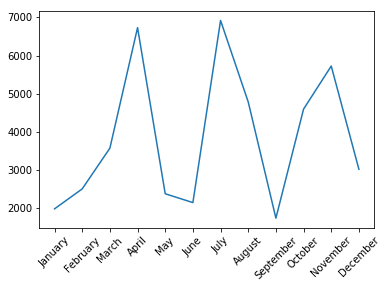

In [13]:
df = pd.read_csv("Pollution_Devanshu.csv")
count_months = [0 for i in range(12)]
tweet_count = {}
bad_rows = []
for i in df.index:
    if(type(df["hashtags"][i]) != str):
        print(i)
        bad_rows.append(i)
    # 'YYYY-MM-DD'
    try:
        if df['date'][i][0:7] in tweet_count.keys():
            tweet_count[df['date'][i][0:7]]+=1
        else:
            tweet_count[df['date'][i][0:7]]=1
        month = int(df['date'][i][5:7])
        count_months[month-1]+=1
    except:
        print(i, df['date'][i], df['id'][i], df['created_at'][i])
        bad_rows.append(i)
        
# df = df.drop(bad_rows)
# df.to_csv( "Pollution_Devanshu.csv", index=False, encoding='utf-8-sig')

months = ["January", "February","March","April", "May","June","July", "August", "September", "October", "November", "December"]
plt.plot(months, count_months)
plt.xticks(rotation=45)

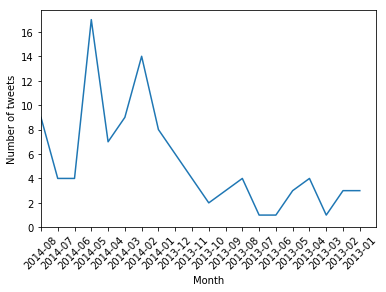

In [14]:
plt.plot(list(tweet_count.keys())[84:], list(tweet_count.values())[84:])
plt.ylabel("Number of tweets")
plt.xlabel("Month")
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.xticks(rotation=45)
plt.savefig("Pollution_plot.png",dpi=300, bbox_inches='tight')

pd.DataFrame({'Month': list(tweet_count.keys()), 'tweet count': list(tweet_count.values())}).to_csv('Monthly_tweet_count.csv', index=False)

## Q7

In [ ]:
""" #DOCSTRING of funtion used to get info about it
?WordCloud """

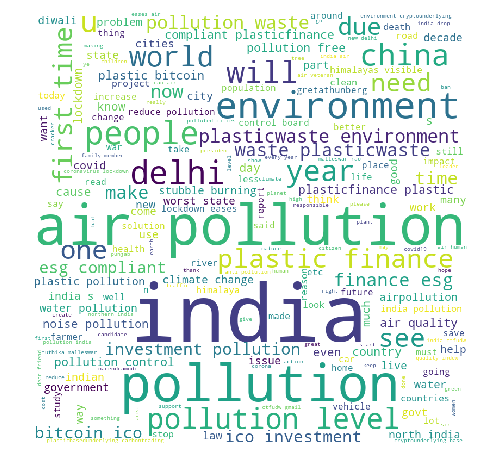

In [15]:
# Create a word cloud for tweets collected, may take sometime
df = pd.read_csv("Pollution_Devanshu.csv")
tweets = df['tweet'].values.tolist()

words = ''
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("t")
stopwords.add("co")
stopwords.add("amp")

# Iterate through tweets
for t in tweets:
    # Convert to string
    t = str(t)
    # Tokenize
    tokens = t.split()
    # Convert each to lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    # Add to word
    words += " ".join(tokens)+" "

# Word cloud setup
wordcloud = WordCloud(width = 800, height = 800,
                     background_color="white",
                     stopwords = stopwords,
                     min_font_size = 10).generate(words)

# Plot
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Pollution_wordcloud.png",dpi=300, bbox_inches='tight')
plt.show()

## Q8

In [ ]:
df=pd.read_csv("Pollution_Devanshu.csv")  
tweets = []
timezones = []
urls = []

for i in df.index:
    timezones.append(df['timezone'][i])
    urls.append(df['urls'][i])
        
Total_tweets = df.shape
Total_timezones = len(Counter(timezones))
Total_urls = len(Counter(urls))
print("Total_mentions ", Total_mentions, "\nTotal_hastags ", Total_hastags, "\nTotal_languages ", Total_languages,"\nTotal_timezones ",Total_timezones, "\nTotal URLs", Total_urls,"\nTotal tweets ", Total_tweets)